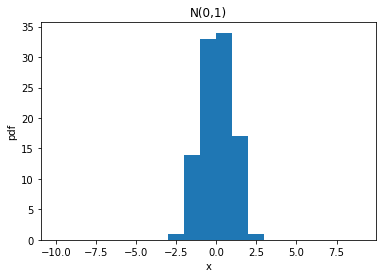

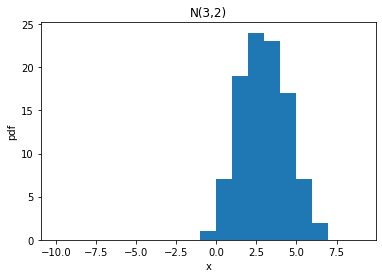

In [73]:
#-----------------------------------------------------Q1 (a)----------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

x1 = np.random.normal(0,1,100)
x2 = np.random.normal(3,np.sqrt(2),100)
bins = np.arange(-10,10)
plt.figure(1)
plt.hist(x1,bins,histtype='bar',linewidth=2)
plt.xlabel("x")
plt.ylabel("pdf")
plt.title("N(0,1)")
plt.figure(2)
plt.hist(x2,bins,histtype='bar',linewidth=2)
plt.xlabel("x")
plt.ylabel("pdf")
plt.title("N(3,2)")
plt.show()

# Looking at the plots for N(0,1) and N(3,2) we can comment that standard deviation gives a sense of spread of a normal
# curve, since N(3,2) has higher SD hence it is more spread out in comparison. The peak of normal curve is inversely related
# to SD hence N(3,2) is having lower peak in comaprison. Mu tells us about the point where the curve is centred hence N(0,1)
# is centred around 0 whereas N(3,2) is centered around 3


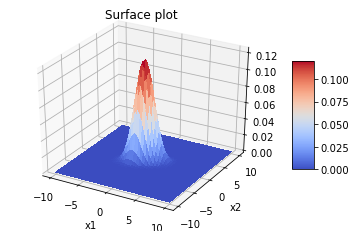

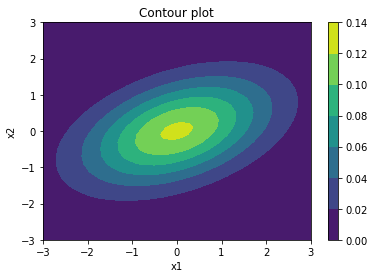

In [43]:
#-----------------------------------------------------Q1 (b)----------------------------------------------------------
#-----------------------------------------------SURFACE AND CONTOUR PLOT----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure()
ax = fig.gca(projection='3d')
mean = np.matrix([0, 0]) # Mean vector
cov = np.matrix([[1, 0.6], [0.6, 2]]) # Covarince matrix
arr = []

# 2D normal density function at x = [x1,x2]
def normal_2D(x,mu,co):
    co_inv = np.linalg.inv(co)
    x_mu_t = (x-mu).transpose()
    
    a1 = 1/(2*np.pi)
    a2 = 1/((np.linalg.det(cov))**0.5)
    a3 = (x-mu)*co_inv*(x_mu_t)*(-0.5)
    a = np.linalg.det(a3)
    p = a1*a2*(np.e**a)
    return p 



x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)


for i in range(100):
    for j in range(100):
        x = np.mat([x1[i],x2[j]])
        p = normal_2D(x,mean,cov)
        arr = np.append(arr,p)
        
# arr contains 100*100 points of probability values computed at x = [x1,x2]

arr = arr.reshape(100,100)    
x1,x2 = np.meshgrid(x1,x2)
surf = ax.plot_surface(x1,x2,arr, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.figure(1)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Surface plot")

#Contour plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x1,x2,arr)
fig.colorbar(cp)
plt.ylim((-3,3))
plt.xlim((-3,3))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Contour plot")
plt.show()


In [76]:
#-----------------------------------------------------Q2----------------------------------------------------------
#--------------------------------------PART-1: EXTRACTING DATA FROM DATASET---------------------------------------

import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


opened_csv_file = open("C:/Users/avikh/Desktop/SPML_Sem1/ML/Lab/iris.data", 'r') # File handling operation
reader = csv.reader(opened_csv_file) # Read the data given in the data set in the form of lists
features = []
for row in reader:
        features.append(row)
opened_csv_file.close()

features.pop() # Removing the last element which was an empty space in data 
# Now we will be having features which will be a 2D list but having all entries in string format 


data_set = []

for i in range(len(features)):
    lst = []
    for j in range(4): # Excluding the class label for now for computational convinience 
        lst.append(float(features[i][j]))
    data_set.append(lst)

data_set = np.matrix(data_set)

# Finally we would have convered the 2D feature vector we had before into our desired data set format which is having all 
# entries in float and can be realised as a 2D matrix

print(data_set)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [77]:
#-----------------------------------------------------Q2----------------------------------------------------------
#--------------------------------------PART-2: COMING UP WITH TRAINING DATA SET---------------------------------------

# Our data set is having 150 elements, with 50 elements from each class

setosa = data_set[0:50] # First 50 elements from Setosa class 
np.random.shuffle(setosa) # Since we want to make a random selection of training examples from setosa data-set
setosa_train = setosa[0:35] # Taking 70% as training examples hence taking 35 randomly selected samples as training set


versicolor = data_set[50:100] #  51-100 elements from Versicolor class 
np.random.shuffle(versicolor) # Since we want to make a random selection of training examples from Versicolor data-set
versicolor_train = versicolor[0:35] # Taking 70% as training examples hence taking 35 randomly selected samples as training set

virginica = data_set[100:150] #  101-150 elements 
np.random.shuffle(virginica)
virginica_train = virginica[0:35]

print(versicolor_train) # Just for understanding


[[5.6 3.  4.1 1.3]
 [5.9 3.  4.2 1.5]
 [5.7 2.9 4.2 1.3]
 [6.7 3.1 4.4 1.4]
 [7.  3.2 4.7 1.4]
 [5.7 3.  4.2 1.2]
 [5.  2.3 3.3 1. ]
 [6.8 2.8 4.8 1.4]
 [6.4 2.9 4.3 1.3]
 [5.5 2.5 4.  1.3]
 [6.9 3.1 4.9 1.5]
 [5.7 2.8 4.1 1.3]
 [5.8 2.7 4.1 1. ]
 [6.4 3.2 4.5 1.5]
 [6.5 2.8 4.6 1.5]
 [6.2 2.9 4.3 1.3]
 [5.8 2.7 3.9 1.2]
 [5.6 2.7 4.2 1.3]
 [5.  2.  3.5 1. ]
 [5.7 2.8 4.5 1.3]
 [5.5 2.6 4.4 1.2]
 [6.3 3.3 4.7 1.6]
 [6.3 2.5 4.9 1.5]
 [5.7 2.6 3.5 1. ]
 [6.  2.7 5.1 1.6]
 [5.2 2.7 3.9 1.4]
 [6.  2.9 4.5 1.5]
 [6.1 3.  4.6 1.4]
 [5.6 2.9 3.6 1.3]
 [6.2 2.2 4.5 1.5]
 [6.3 2.3 4.4 1.3]
 [6.7 3.  5.  1.7]
 [5.5 2.4 3.7 1. ]
 [6.  3.4 4.5 1.6]
 [5.5 2.4 3.8 1.1]]


In [79]:
#-----------------------------------------------------Q2----------------------------------------------------------
#--------------------------------------PART-3: CALCULATING MEAN AND COVARIANCE MATRIX-----------------------------

mu1 = setosa_train.sum(0)/35     # sum(0) will compute sum along columns of the 2D matrix and dividing by 35 gives the mean 
mu2 = versicolor_train.sum(0)/35 # Similary calculating mu2 and mu3
mu3 = virginica_train.sum(0)/35

#Initialising the covariance matrices for each class
cov1 = 0
cov2 = 0
cov3 = 0

# We have used the formula that mu = E(x) and cov = E[(x-u)*(x-u)']
for i in range(35):
    x = setosa_train[i]-mu1
    y = versicolor_train[i]-mu2
    z = virginica_train[i]-mu3
    cov1 += x.getT()*x # (x-u)*(x-u)'
    cov2 += y.getT()*y
    cov3 += z.getT()*z
    
#Dividing by 35 to get the average 
cov1 = cov1/35
cov2 = cov2/35
cov3 = cov3/35

#Just for understanding
print("mu1 =",mu1,"\n")
print("Cov1 =",cov1,"\n\n")

print('mu2 =',mu2,'\n')
print('Cov2=',cov2,'\n\n')

print('mu3=',mu3,'\n')
print('Cov3=',cov3,'\n\n')

mu1 = [[5.05142857 3.44       1.47428571 0.24285714]] 

Cov1 = [[0.12992653 0.10137143 0.01732245 0.01322449]
 [0.10137143 0.14068571 0.01417143 0.01628571]
 [0.01732245 0.01417143 0.03505306 0.00653061]
 [0.01322449 0.01628571 0.00653061 0.01159184]] 


mu2 = [[5.96571429 2.78       4.28285714 1.33428571]] 

Cov2= [[0.25653878 0.08474286 0.1745551  0.0608898 ]
 [0.08474286 0.09931429 0.06594286 0.03411429]
 [0.1745551  0.06594286 0.19342041 0.06773061]
 [0.0608898  0.03411429 0.06773061 0.03539592]] 


mu3= [[6.59714286 3.00285714 5.54857143 2.05714286]] 

Cov3= [[0.43970612 0.10972245 0.33213878 0.06302041]
 [0.10972245 0.12313469 0.09471837 0.04926531]
 [0.33213878 0.09471837 0.3333551  0.06522449]
 [0.06302041 0.04926531 0.06522449 0.06530612]] 




In [81]:
#-----------------------------------------------------Q2----------------------------------------------------------
#------------------PART-4: DEFINING DISCRIMINANT FUNCTIONS AND DEVELOPING A MINIMUM ERROR RATE CLASSIFIER---------

#Ignoring the apriori probability in all gi(X) since it is constant for all classes which is 1/3

def g1(X): # Discriminant Function corresponding to Setosa class

    cov1_inv = np.linalg.inv(cov1)
    cov1_det = np.linalg.det(cov1)
    p = (X-mu1)*cov1_inv*(X-mu1).transpose()*(-0.5) + (-0.5)*(np.log(cov1_det)) 
    return p
    
def g2(X): # Discriminant Function corresponding to Versicolor class

    cov2_inv = np.linalg.inv(cov2)
    cov2_det = np.linalg.det(cov2)
    p = (X-mu2)*cov2_inv*(X-mu2).transpose()*(-0.5) + (-0.5)*(np.log(cov2_det))
    return p
    
def g3(X): # Discriminant Function corresponding to Virginica class

    cov3_inv = np.linalg.inv(cov3)
    cov3_det = np.linalg.det(cov3)
    p = (X-mu3)*cov3_inv*(X-mu3).transpose()*(-0.5) + (-0.5)*(np.log(cov3_det))
    return p

# Minimum error rate classifier which will select the maximum value from the 3 discriminant functions output and classify 
# the data point into the corresponding class

def classifier(x):
    if (g1(x)>g2(x) and g1(x)>g3(x)):
        return "Iris-setosa"
    if (g2(x)>g1(x) and g2(x) >g3(x)):
        return "Iris-versicolor"
    if (g3(x)>g1(x) and g3(x)>g2(x)):
        return "Iris-virginica"

# Displaying the 'True class' label and 'Predicted class' label of a given data point with the help of classifier

for i in range(150):
    print("True class:",features[i][4],"\tPredicted class:",classifier(data_set[i]))

True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Predicted class: Iris-setosa
True class: Iris-setosa 	Pre

In [82]:
#-----------------------------------------------------Q2----------------------------------------------------------
#-------------------------------PART-5: CONSTRUCTING CONFUSION MATRIX---------------------------------------------

#Initialising the arrays containing True and Predicted labels
true = np.array([])
predicted = np.array([])

for i in range(150):
    true = np.append(true,features[i][4])
    predicted = np.append(predicted, classifier(data_set[i]))


# Matrix 1 shows the actual number of data points classified 
matrix1 = confusion_matrix(true, predicted,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"]) 


# Matrix 2 gives the normalised values and also the probability of making a correct/wrong classification decision
matrix2 = confusion_matrix(true, predicted,labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],normalize='true')


print("Actual Confusion Matrix\n",matrix1,'\n')
print("Normalised Confusion Matrix\n",matrix2)

Actual Confusion Matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]] 

Normalised Confusion Matrix
 [[1.   0.   0.  ]
 [0.   0.96 0.04]
 [0.   0.02 0.98]]


In [71]:
#-----------------------------------------------------Q2----------------------------------------------------------
#---------------------------------------------PART-6: CONCLUSION---------------------------------------------

# Looking at the Confusion Matrix we can conclude that-

#1. All data points belonging to Setosa class (50/50) have been correctly classified and hence the accuracy of prediction 
# is 100%  for setosa data points

#2. While for Versicolor class 48/50 samples have been correctly classified while 2 samples have been wrongly classified 
# into Vergininca class and hence accuracy of prediction for data points in Versicolor class is 96%

#3. While for Virginica class 49/50 samples have been correctly classified while 1 sample has been wrongly classified into 
# Versicolor class and hence accuracy of prediction for data points in Virginica class is 98%

#4. Hence overall accuracy of classification using a Naive Bayes Classifier is (1+0.96+0.98)/3 = 0.98, Hence any random 
# sample selected from the dataset will be correctly classified 98% times.